In [1]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"


--2025-05-01 04:32:33--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 04:32:33--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

In [7]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

In [4]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


In [ ]:
df.columns

Index(['id_cliente', 'edad', 'genero', 'ingresos', 'plataforma',
       'interacciones', 'compras', 'promedio_ticket', 'total_gastado',
       'fecha_primer_compra', 'fecha_ultima_compra', 'dias_desde_ultima',
       'recomendaciones', 'costo_adquisicion'],
      dtype='object')

Fase 1 – Análisis Exploratorio Avanzado (EDA)
P1. Distribución multivariada

a) Representa la relación edad vs. ingresos vs. plataforma en un gráfico de dispersión
3–D o de burbujas.

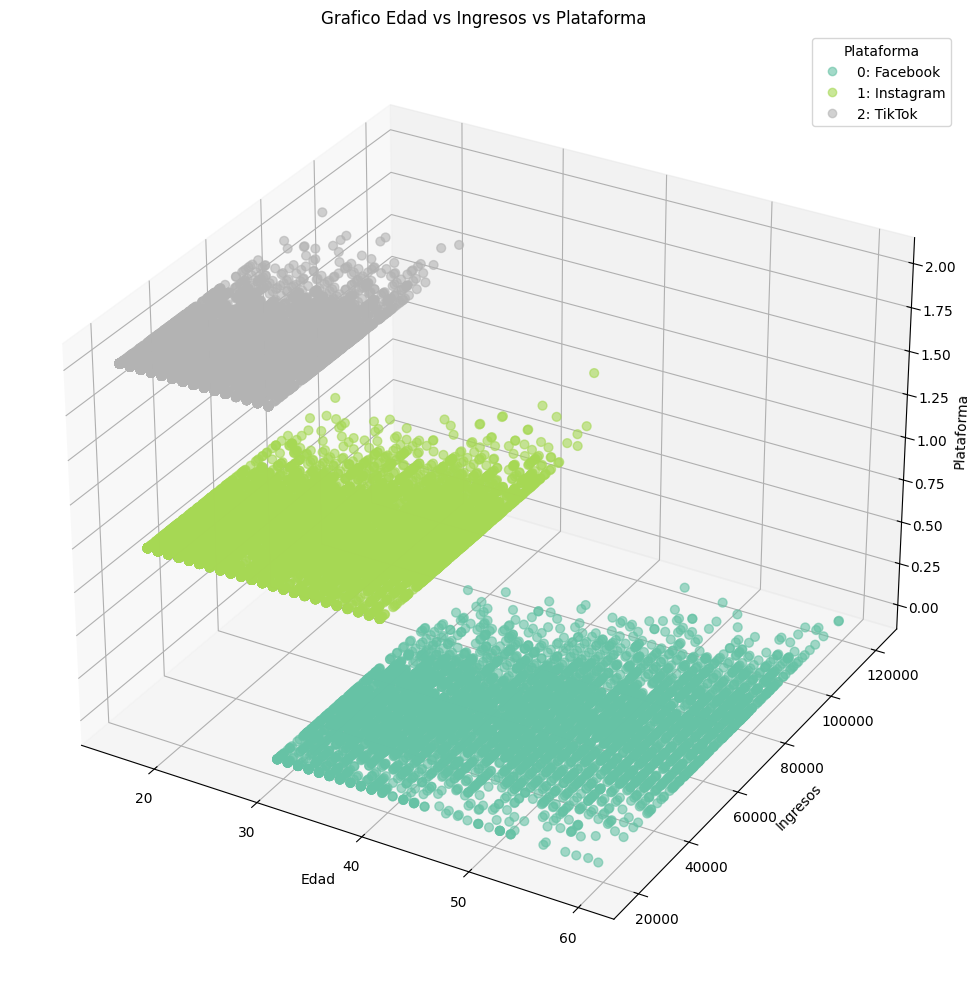

In [ ]:
import matplotlib.pyplot as plt

df['plataforma_num'] = df['plataforma'].astype('category').cat.codes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['edad'], df['ingresos'], df['plataforma_num'],
    c=df['plataforma_num'], cmap='Set2', s=40, alpha=0.6
)

ax.set_xlabel('Edad')
ax.set_ylabel('Ingresos')
ax.set_zlabel('Plataforma')
ax.set_title('Grafico Edad vs Ingresos vs Plataforma')

handles, labels = scatter.legend_elements(prop="colors")
platform_labels = df['plataforma'].astype('category').cat.categories
legend_labels = [f'{i}: {label}' for i, label in enumerate(platform_labels)]
ax.legend(handles, legend_labels, title='Plataforma', loc='upper right')

plt.tight_layout()
plt.show()

b) Identifica y comenta dos insights accionables.

### Insights encontrados

**Hay diferenciacion de edad por plataforma**
- **TikTok:** Mayor poblacion joven (aproximadamente 18-29 años).
- **Instagram:** Adultos jovenes (aproximadamente 28-40 años).
- **Facebook:** Altos mayores, a partir de los 40 anios.

Se evidencia diferencias en las edades con respecto a las plataformas.

**Los ingresos promedio parecen aumentar con la edad:**

Hay una tendencia de crecimiento: a medida que aumenta la edad, aumentan los ingresos.



P2. RFM preliminar
• Calcula Recency (días desde última compra), Frequency (número de compras) y Monetary
(total gastado).

In [ ]:
df['R'] = df['dias_desde_ultima']
df['F'] = df['compras']
df['M'] = df['total_gastado']

• Muestra una matriz de correlaciones (heatmap) de R, F, M + recomendaciones.

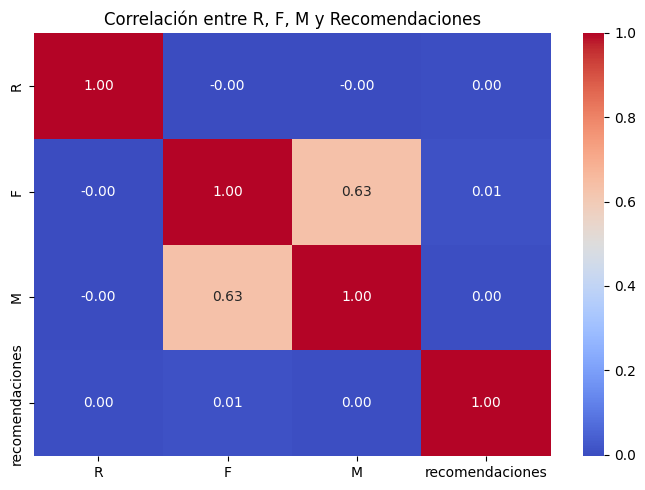

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rfm_df = df[['R', 'F', 'M', 'recomendaciones']]
corr = rfm_df.corr()

# Crear el heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre R, F, M y Recomendaciones')
plt.tight_layout()
plt.show()



• ¿Qué combinación de variables captura mejor el valor futuro del cliente? Justifica.

Hay una correlacion fuerte de 0.63 entre el frequency y el monetary, lo que indica que a mayor Frequency hay un mayo valor del Monetary. no hay mayor relacion entre las otras variables entre si, dado que, estos valores se encuentran en 0.0


Fase 2 – Métricas de Negocio (CAC, LTV, ROI)
P3. CAC detallado
Calcula el CAC ponderado por plataforma considerando el campo costo_adquisicion y el
porcentaje de clientes activos por plataforma. Presenta los resultados en un gráfico de
barras apiladas

Mediana de días desde la última compra (Umbral de inactividad): 94.00 días

CAC Preliminar por Plataforma:
  plataforma  cac_preliminar
0   Facebook       25.014014
1  Instagram       17.484212
2     TikTok       12.460716

Porcentaje de Clientes Activos por Plataforma:
plataforma
Facebook     0.499520
Instagram    0.499421
TikTok       0.505077
Name: porcentaje_clientes_activos, dtype: float64

Resultados del CAC Ponderado por Plataforma:
  plataforma  cac_preliminar  porcentaje_clientes_activos  cac_ponderado  \
0   Facebook       25.014014                     0.499520      12.495002   
1  Instagram       17.484212                     0.499421       8.731990   
2     TikTok       12.460716                     0.505077       6.293627   

   cac_inactivo  
0     12.519012  
1      8.752223  
2      6.167089  


<Figure size 1000x700 with 0 Axes>

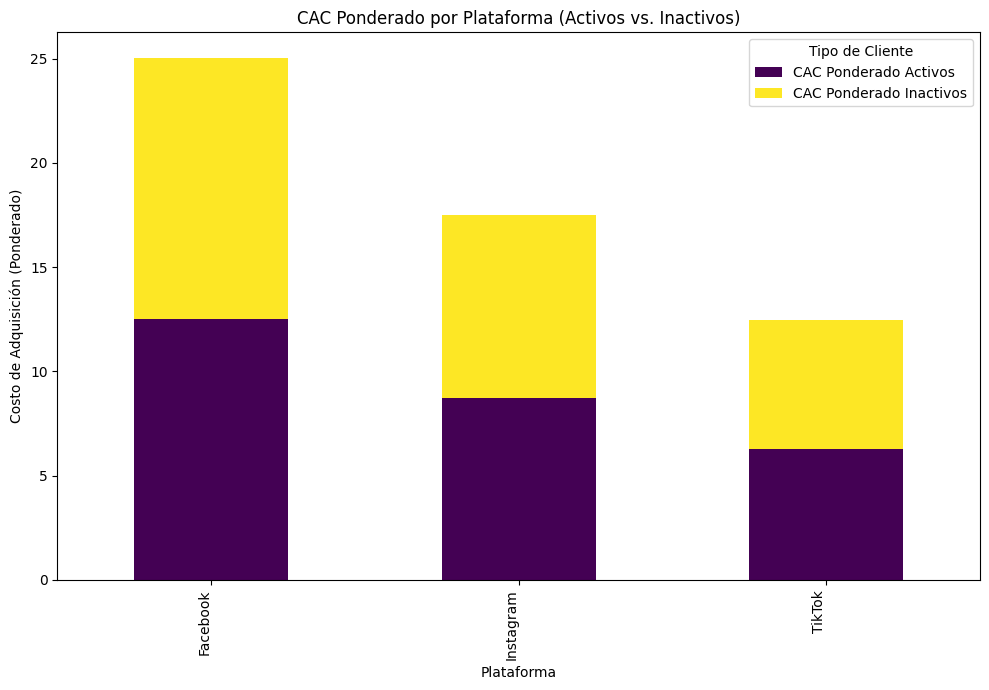

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mediana_dias_inactivo = df['dias_desde_ultima'].median()
print(f"Mediana de días desde la última compra (Umbral de inactividad): {mediana_dias_inactivo:.2f} días")

df['cliente_activo'] = df['dias_desde_ultima'] <= mediana_dias_inactivo

cac_preliminar = df.groupby('plataforma').agg(
    costo_total_adquisicion=('costo_adquisicion', 'sum'),
    num_clientes=('id_cliente', 'count')
).reset_index()

cac_preliminar['cac_preliminar'] = cac_preliminar['costo_total_adquisicion'] / cac_preliminar['num_clientes']

print("\nCAC Preliminar por Plataforma:")
print(cac_preliminar[['plataforma', 'cac_preliminar']])

clientes_actividad_por_plataforma = df.groupby('plataforma')['cliente_activo'].value_counts(normalize=True).unstack(fill_value=0)

if True not in clientes_actividad_por_plataforma.columns:
    clientes_actividad_por_plataforma[True] = 0

clientes_actividad_por_plataforma = clientes_actividad_por_plataforma.rename(columns={True: 'porcentaje_clientes_activos'})

print("\nPorcentaje de Clientes Activos por Plataforma:")
print(clientes_actividad_por_plataforma['porcentaje_clientes_activos'])

cac_ponderado_df = pd.merge(cac_preliminar, clientes_actividad_por_plataforma[['porcentaje_clientes_activos']], on='plataforma')

cac_ponderado_df['cac_ponderado'] = cac_ponderado_df['cac_preliminar'] * cac_ponderado_df['porcentaje_clientes_activos']

cac_ponderado_df['porcentaje_clientes_inactivos'] = 1 - cac_ponderado_df['porcentaje_clientes_activos']
cac_ponderado_df['cac_inactivo'] = cac_ponderado_df['cac_preliminar'] * cac_ponderado_df['porcentaje_clientes_inactivos']

print("\nResultados del CAC Ponderado por Plataforma:")
print(cac_ponderado_df[['plataforma', 'cac_preliminar', 'porcentaje_clientes_activos', 'cac_ponderado', 'cac_inactivo']])

cac_apilado = cac_ponderado_df.set_index('plataforma')[['cac_ponderado', 'cac_inactivo']]
cac_apilado.columns = ['CAC Ponderado Activos', 'CAC Ponderado Inactivos']

plt.figure(figsize=(10, 7))
cac_apilado.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

plt.title('CAC Ponderado por Plataforma (Activos vs. Inactivos)')
plt.xlabel('Plataforma')
plt.ylabel('Costo de Adquisición (Ponderado)')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Tipo de Cliente')
plt.tight_layout()
plt.show()

Considerando la gráfica presentada, se observa que Facebook es la plataforma con el mayor costo de adquisición ponderado. Por lo tanto, si el objetivo es maximizar la cantidad de usuarios activos en el negocio, enfocarse en Facebook puede ser una estrategia efectiva. Por otro lado, TikTok presenta el menor costo de adquisición, lo que lo convierte en una excelente opción para captar la mayor cantidad de clientes con una inversión mínima.



P4


Cálculo del LTV proyectado a 12 meses (primeras filas):
  id_cliente  promedio_ticket  compras  dias_desde_ultima  frecuencia_mensual  \
0     C00000              114        2                 97            0.612245   
1     C00001               88        1                 24            1.200000   
2     C00002               23        3                 27            3.214286   
3     C00003               47        1                 44            0.666667   
4     C00004              102        1                 53            0.555556   

   tasa_de_retencion  ltv_proyectado_12m  
0                0.6          502.530612  
1                0.8         1013.760000  
2                0.8          709.714286  
3                0.8          300.800000  
4                0.8          544.000000  


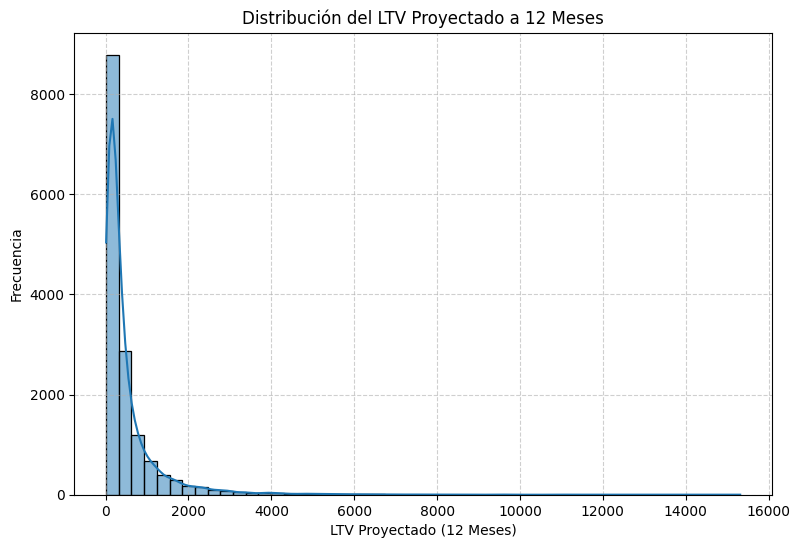


LTV en el percentil 90: 1224.11

Número de clientes en el percentil 90 de LTV: 1500

Clientes en el percentil 90 de LTV (primeras 10 filas):
   id_cliente  ltv_proyectado_12m  promedio_ticket  compras  \
8      C00008         1632.000000               17        5   
17     C00017         2744.470588               81        2   
21     C00021         1401.081081               90        2   
27     C00027         2227.200000               58        2   
29     C00029         1904.727273               97        3   
39     C00039         2947.764706               58        3   
53     C00053         3888.000000              108        2   
54     C00054         1824.000000              114        1   
86     C00086         2094.545455               80        4   
99     C00099         1311.319149              107        2   

    dias_desde_ultima  tasa_de_retencion  
8                  14                0.8  
17                 16                0.8  
21                 36              

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['promedio_ticket'] = pd.to_numeric(df['promedio_ticket'], errors='coerce')
df['compras'] = pd.to_numeric(df['compras'], errors='coerce')
df['dias_desde_ultima'] = pd.to_numeric(df['dias_desde_ultima'], errors='coerce')
df.dropna(subset=['promedio_ticket', 'compras', 'dias_desde_ultima'], inplace=True)
df['tiempo_vida_dias'] = df['dias_desde_ultima'] + 1
df['frecuencia_mensual'] = 0.0
df.loc[df['compras'] > 0, 'frecuencia_mensual'] = (df['compras'] / df['tiempo_vida_dias']) * 30

def obtener_tasa_retencion(dias):
    if dias <= 90:
        return 0.80
    elif 91 <= dias <= 180:
        return 0.60
    else:
        return 0.30

df['tasa_de_retencion'] = df['dias_desde_ultima'].apply(obtener_tasa_retencion)
df['ltv_proyectado_12m'] = df['promedio_ticket'] * df['frecuencia_mensual'] * 12 * df['tasa_de_retencion']
df['ltv_proyectado_12m'] = df['ltv_proyectado_12m'].fillna(0)
print("\nCálculo del LTV proyectado a 12 meses (primeras filas):")
print(df[['id_cliente', 'promedio_ticket', 'compras', 'dias_desde_ultima', 'frecuencia_mensual', 'tasa_de_retencion', 'ltv_proyectado_12m']].head())

plt.figure(figsize=(9, 6))
sns.histplot(df['ltv_proyectado_12m'], kde=True, bins=50)
plt.title('Distribución del LTV Proyectado a 12 Meses')
plt.xlabel('LTV Proyectado (12 Meses)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

percentil_90_ltv = df['ltv_proyectado_12m'].quantile(0.90)
print(f"\nLTV en el percentil 90: {percentil_90_ltv:.2f}")
clientes_percentil_90 = df[df['ltv_proyectado_12m'] >= percentil_90_ltv]
print(f"\nNúmero de clientes en el percentil 90 de LTV: {len(clientes_percentil_90)}")
print("\nClientes en el percentil 90 de LTV (primeras 10 filas):")
print(clientes_percentil_90[['id_cliente', 'ltv_proyectado_12m', 'promedio_ticket', 'compras', 'dias_desde_ultima', 'tasa_de_retencion']].head(10))


Calculo de margen


Cálculo del Margen (primeras filas):
  id_cliente  ltv_proyectado_12m  costo_adquisicion      margen
0     C00000          502.530612                 25  477.530612
1     C00001         1013.760000                 24  989.760000
2     C00002          709.714286                 16  693.714286
3     C00003          300.800000                 29  271.800000
4     C00004          544.000000                 32  512.000000


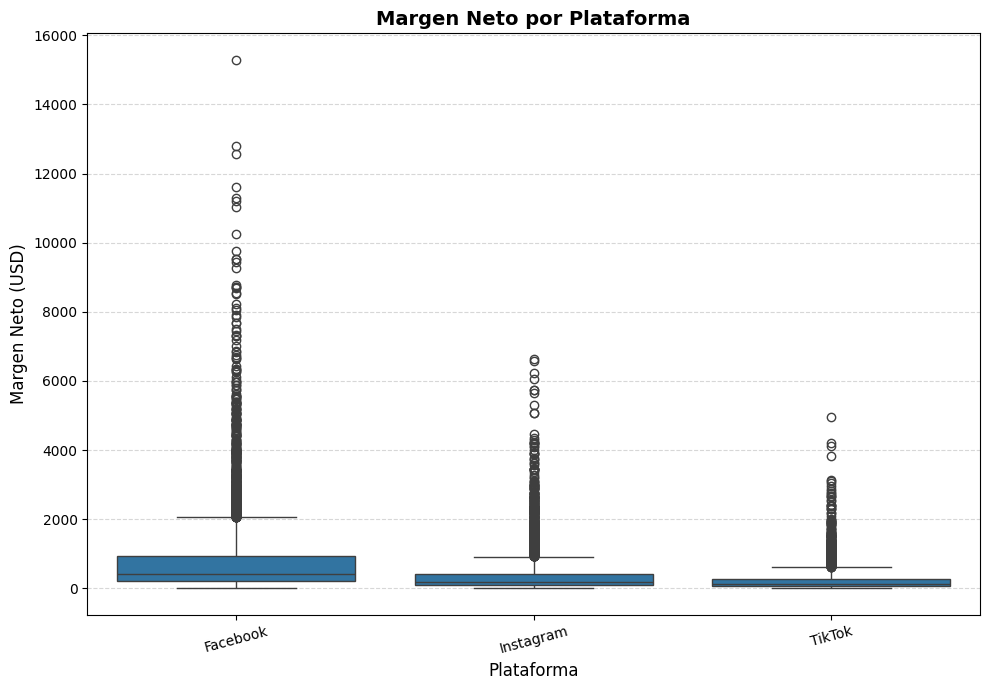


Margen Neto Promedio por Plataforma:
plataforma
Facebook     828.669865
Instagram    378.846427
TikTok       245.253444
Name: margen, dtype: float64

Margen Neto Mediana por Plataforma:
plataforma
Facebook     423.333333
Instagram    188.720000
TikTok       122.364000
Name: margen, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['ltv_proyectado_12m'] = pd.to_numeric(df['ltv_proyectado_12m'], errors='coerce')
df['costo_adquisicion'] = pd.to_numeric(df['costo_adquisicion'], errors='coerce')
df.dropna(subset=['ltv_proyectado_12m', 'costo_adquisicion'], inplace=True)
df['margen'] = df['ltv_proyectado_12m'] - df['costo_adquisicion']
print("\nCálculo del Margen (primeras filas):")
print(df[['id_cliente', 'ltv_proyectado_12m', 'costo_adquisicion', 'margen']].head())

plt.figure(figsize=(10, 7))
sns.boxplot(x='plataforma', y='margen', data=df)

plt.title('Margen Neto por Plataforma', fontsize=14, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Margen Neto (USD)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

margen_por_plataforma_stats = df.groupby('plataforma')['margen'].describe()
margen_promedio_por_plataforma = df.groupby('plataforma')['margen'].mean().sort_values(ascending=False)
margen_mediana_por_plataforma = df.groupby('plataforma')['margen'].median().sort_values(ascending=False)
print("\nMargen Neto Promedio por Plataforma:")
print(margen_promedio_por_plataforma)
print("\nMargen Neto Mediana por Plataforma:")
print(margen_mediana_por_plataforma)

Tras revisar la grafica y ver los margenes netos de las plataformas, la mejor plataforma para monetizar es facebook, principalmente porque es quien tiene el mayor margen neto por personas en la plataforma. La plataforma con menor margen es Tik Tok, esto hace sentido con lo mostrado en los puntos del inicio, doonde se muestra, que la mayor parte de esta poblacion es joven, lo que indica que no tienen un gran poder adquisitivo.
Ademas, al ver los datos de facebook, este es quien tiene la mayor variabilidad, lo que si bien puede llegar a adquirir un cliente de alto margen neto, es muy posible encontrar un cliente con un margen bastante bajo.

Fase 3

   dias_desde_ultima   compras  total_gastado  recomendaciones
0          92.804450  4.035725     246.005641     3.986211e-01
1          94.729240  1.940861      82.629920     1.297342e+00
2          95.155405  1.825618      77.084819     1.665335e-15


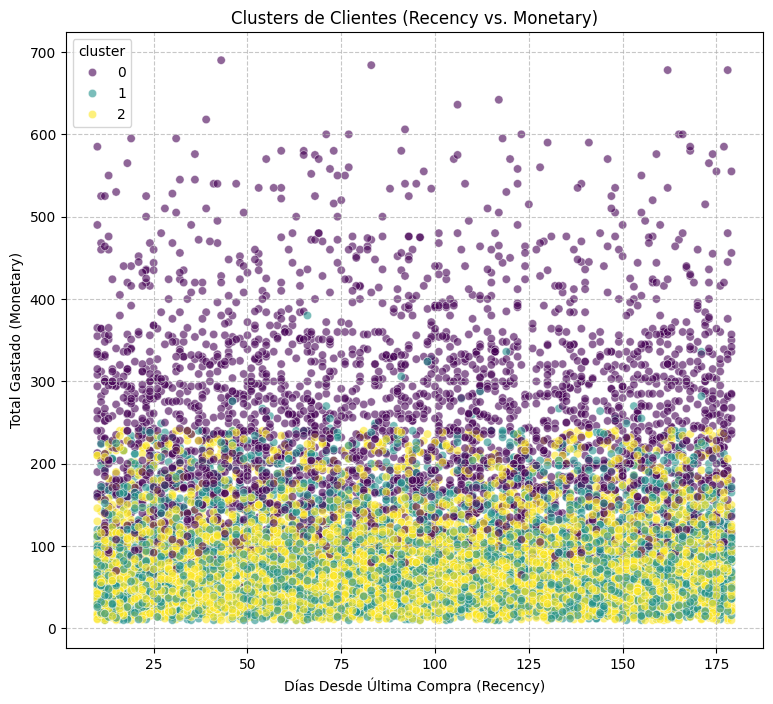

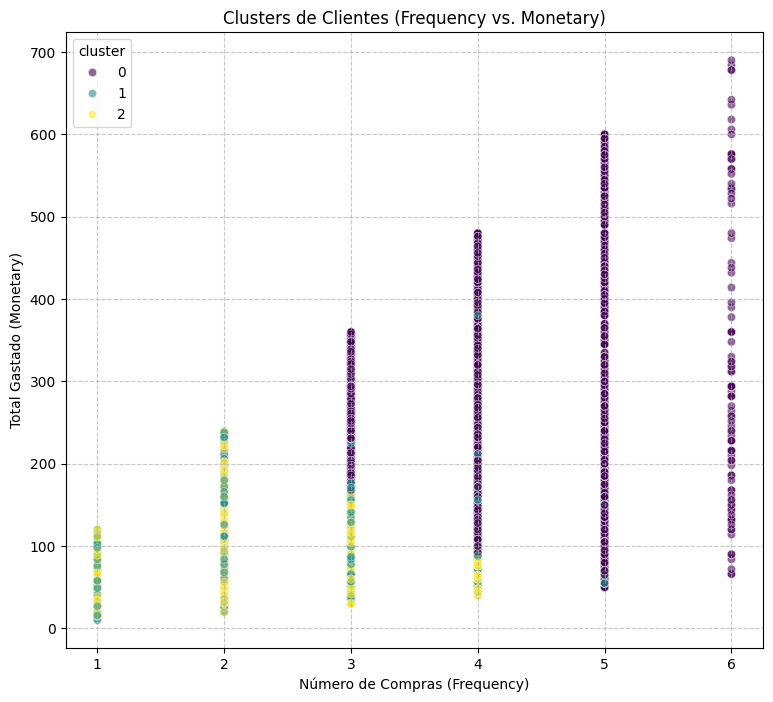

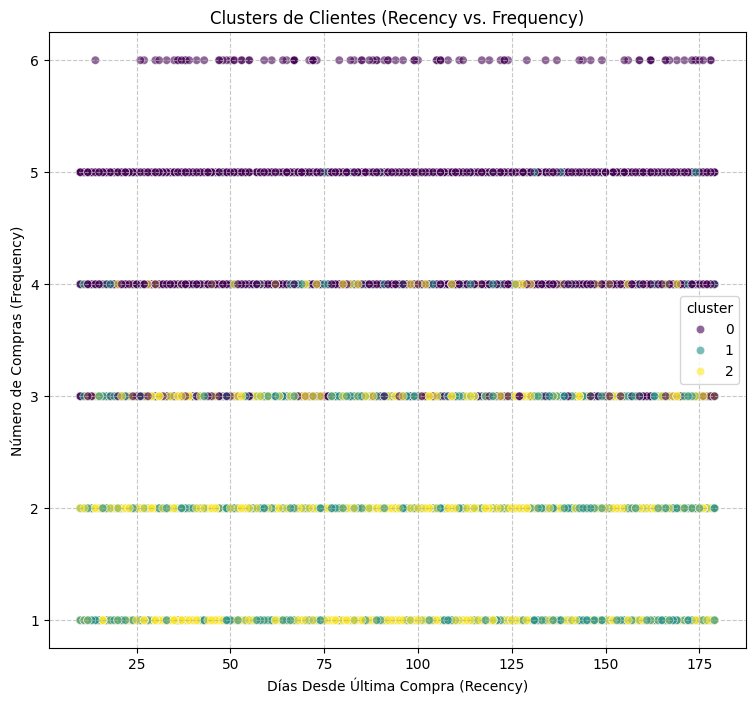

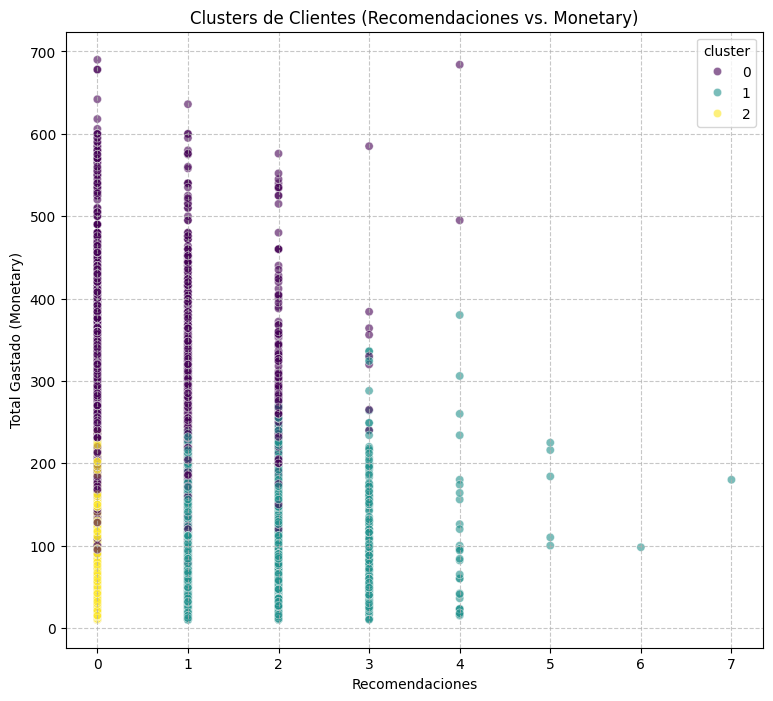

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

segmentation_vars = ['dias_desde_ultima', 'compras', 'total_gastado', 'recomendaciones']
df_segmentation = df[segmentation_vars].copy()
scaler = StandardScaler()
df_segmentation_scaled = scaler.fit_transform(df_segmentation)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_segmentation_scaled)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original, columns=segmentation_vars)
print(cluster_centers_original_df)
cluster_characteristics = df.groupby('cluster')[segmentation_vars].mean()
cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2'
}
cluster_slogans = {
    0: 'Cluster numero 1',
    1: 'Cluster numero 2',
    2: 'Cluster numero 3'
}
df['cluster_nombre'] = df['cluster'].map(cluster_names)
df['cluster_eslogan'] = df['cluster'].map(cluster_slogans)
percentil_75_margen = df['margen'].quantile(0.75)
df['high_margin'] = (df['margen'] >= percentil_75_margen).astype(int)

plt.figure(figsize=(9, 8))
sns.scatterplot(x='dias_desde_ultima', y='total_gastado', hue='cluster', data=df, palette='viridis', legend='full', alpha=0.6)
plt.title('Clusters de Clientes (Recency vs. Monetary)')
plt.xlabel('Días Desde Última Compra (Recency)')
plt.ylabel('Total Gastado (Monetary)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(9, 8))
sns.scatterplot(x='compras', y='total_gastado', hue='cluster', data=df, palette='viridis', legend='full', alpha=0.6)
plt.title('Clusters de Clientes (Frequency vs. Monetary)')
plt.xlabel('Número de Compras (Frequency)')
plt.ylabel('Total Gastado (Monetary)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(9, 8))
sns.scatterplot(x='dias_desde_ultima', y='compras', hue='cluster', data=df, palette='viridis', legend='full', alpha=0.6)
plt.title('Clusters de Clientes (Recency vs. Frequency)')
plt.xlabel('Días Desde Última Compra (Recency)')
plt.ylabel('Número de Compras (Frequency)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(9, 8))
sns.scatterplot(x='recomendaciones', y='total_gastado', hue='cluster', data=df, palette='viridis', legend='full', alpha=0.6)
plt.title('Clusters de Clientes (Recomendaciones vs. Monetary)')
plt.xlabel('Recomendaciones')
plt.ylabel('Total Gastado (Monetary)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Fase 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

presupuesto_total = 10000
cac_promedio_por_cluster = df.groupby('cluster')['costo_adquisicion'].mean()
margen_promedio_por_cluster = df.groupby('cluster')['margen'].mean()

resumen_clusters = pd.DataFrame({
    'cac_promedio': cac_promedio_por_cluster,
    'margen_promedio': margen_promedio_por_cluster
})
escenarios = {}
print("\n Escenario i) Concentrar en un solo cluster ")
for id_cluster in resumen_clusters.index:
    nombre_escenario = f'Concentrar en Cluster {id_cluster}'
    cluster_objetivo = resumen_clusters.loc[id_cluster]
    clientes_adquiridos = presupuesto_total / cluster_objetivo['cac_promedio']
    margen_total_esperado = clientes_adquiridos * cluster_objetivo['margen_promedio']
    roi_esperado = (margen_total_esperado - presupuesto_total) / presupuesto_total * 100 if presupuesto_total > 0 else 0

    escenarios[nombre_escenario] = {
        'Inversion': presupuesto_total,
        'Cluster Objetivo': [id_cluster],
        'Clientes Adquiridos': clientes_adquiridos,
        'Margen Total Esperado': margen_total_esperado,
        'ROI Esperado (%)': roi_esperado
    }
    print(f"{nombre_escenario}: ROI Esperado = {roi_esperado:.2f}%")

print("\n Escenario ii) Distribuir en dos clusters clave ")
top_2_clusters = resumen_clusters.sort_values(by='margen_promedio', ascending=False).head(2)
id_cluster1, id_cluster2 = top_2_clusters.index
nombre_escenario = f'Distribuir 50/50 en Clusters {id_cluster1} y {id_cluster2}'
presupuesto_por_cluster = presupuesto_total / 2
clientes_adquiridos_c1 = presupuesto_por_cluster / resumen_clusters.loc[id_cluster1]['cac_promedio']
margen_esperado_c1 = clientes_adquiridos_c1 * resumen_clusters.loc[id_cluster1]['margen_promedio']
clientes_adquiridos_c2 = presupuesto_por_cluster / resumen_clusters.loc[id_cluster2]['cac_promedio']
margen_esperado_c2 = clientes_adquiridos_c2 * resumen_clusters.loc[id_cluster2]['margen_promedio']
total_clientes_adquiridos = clientes_adquiridos_c1 + clientes_adquiridos_c2
margen_total_esperado = margen_esperado_c1 + margen_esperado_c2
roi_esperado = (margen_total_esperado - presupuesto_total) / presupuesto_total * 100 if presupuesto_total > 0 else 0

escenarios[nombre_escenario] = {
    'Inversion': presupuesto_total,
    'Cluster Objetivo': [id_cluster1, id_cluster2],
    'Clientes Adquiridos': total_clientes_adquiridos,
    'Margen Total Esperado': margen_total_esperado,
    'ROI Esperado (%)': roi_esperado
}
print(f"{nombre_escenario}: ROI Esperado = {roi_esperado:.2f}%")
print("\n--- Escenario iii) Asignar proporcional al margen esperado ---")
margen_total_esperado_todos_clusters = resumen_clusters['margen_promedio'].sum()
nombre_escenario = 'Asignar Proporcional al Margen Promedio'
total_clientes_adquiridos = 0
margen_total_esperado = 0

for id_cluster in resumen_clusters.index:
    proporcion = resumen_clusters.loc[id_cluster]['margen_promedio'] / margen_total_esperado_todos_clusters
    presupuesto_para_cluster = presupuesto_total * proporcion
    clientes_adquiridos_cluster = presupuesto_para_cluster / resumen_clusters.loc[id_cluster]['cac_promedio']
    margen_esperado_cluster = clientes_adquiridos_cluster * resumen_clusters.loc[id_cluster]['margen_promedio']

    total_clientes_adquiridos += clientes_adquiridos_cluster
    margen_total_esperado += margen_esperado_cluster

roi_esperado = (margen_total_esperado - presupuesto_total) / presupuesto_total * 100 if presupuesto_total > 0 else 0
escenarios[nombre_escenario] = {
    'Inversión': presupuesto_total,
    'Cluster(s) Objetivo': 'Proporcional',
    'Clientes Adquiridos': total_clientes_adquiridos,
    'Margen Total Esperado': margen_total_esperado,
    'ROI Esperado (%)': roi_esperado
}
print(f"{nombre_escenario}: ROI Esperado = {roi_esperado:.2f}%")
resultados_escenarios_df = pd.DataFrame.from_dict(escenarios, orient='index')
print("\n--- Tabla de Resultados de Escenarios ---")
print(resultados_escenarios_df[['ROI Esperado (%)', 'Margen Total Esperado', 'Clientes Adquiridos', 'Cluster(s) Objetivo']].sort_values(by='ROI Esperado (%)', ascending=False))
datos_roi = resultados_escenarios_df['ROI Esperado (%)'].sort_values(ascending=True)



 Escenario i) Concentrar en un solo cluster 
Concentrar en Cluster 0: ROI Esperado = 5218.07%
Concentrar en Cluster 1: ROI Esperado = 1833.77%
Concentrar en Cluster 2: ROI Esperado = 1668.89%

 Escenario ii) Distribuir en dos clusters clave 
Distribuir 50/50 en Clusters 0 y 1: ROI Esperado = 3525.92%

--- Escenario iii) Asignar proporcional al margen esperado ---
Asignar Proporcional al Margen Promedio: ROI Esperado = 3914.86%

--- Tabla de Resultados de Escenarios ---
                                         ROI Esperado (%)  \
Concentrar en Cluster 0                       5218.072837   
Asignar Proporcional al Margen Promedio       3914.860603   
Distribuir 50/50 en Clusters 0 y 1            3525.919475   
Concentrar en Cluster 1                       1833.766113   
Concentrar en Cluster 2                       1668.894082   

                                         Margen Total Esperado  \
Concentrar en Cluster 0                          531807.283736   
Asignar Proporcional al Ma

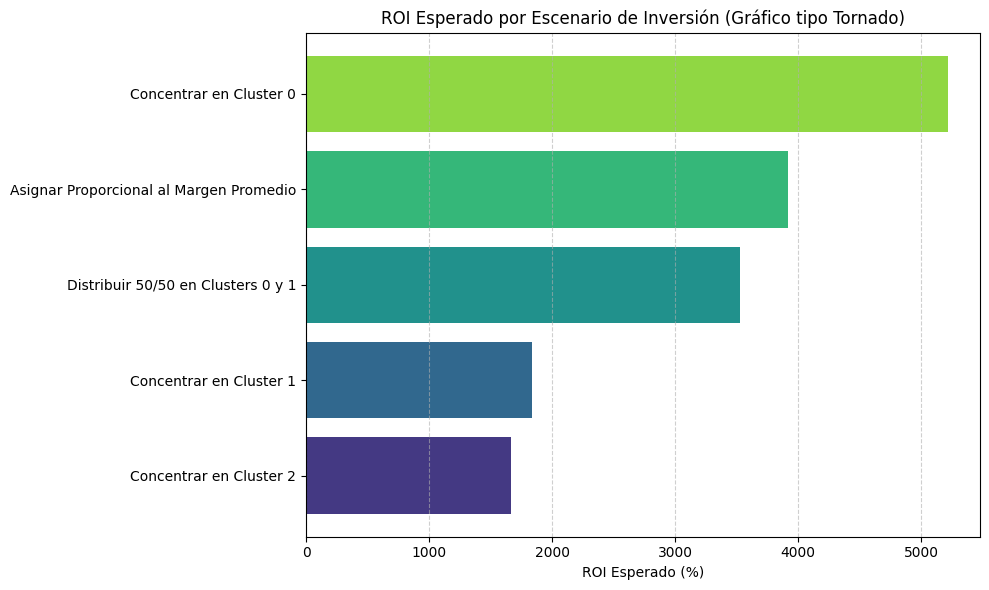

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(datos_roi.index, datos_roi.values, color=sns.color_palette('viridis', len(datos_roi)))
plt.xlabel('ROI Esperado (%)')
plt.title('ROI Esperado por Escenario de Inversión (Gráfico tipo Tornado)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Deacuerdo a los datos presentados, quien tiene mayor ROI es concentrar  toda la poblacion en un solo cluster, y no invertir en costos segmentando la poblacion un poco mas como se evidencia en la grafica mostrada previamente.

### Programa de referidos

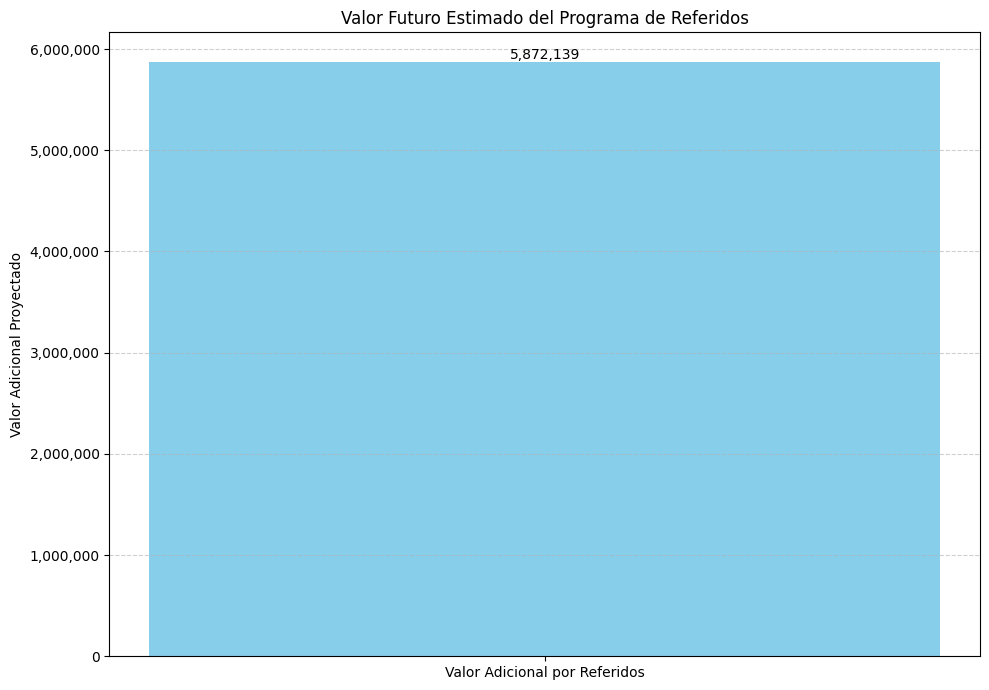

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

segmentation_vars = ['dias_desde_ultima', 'compras', 'total_gastado', 'recomendaciones']
df_segmentation = df[segmentation_vars].copy()
scaler = StandardScaler()
df_segmentation_scaled = scaler.fit_transform(df_segmentation)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_segmentation_scaled)

cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original, columns=segmentation_vars)
cluster_characteristics = df.groupby('cluster')[segmentation_vars].mean()

percentil_75_margen = df['margen'].quantile(0.75)
df['high_margin'] = (df['margen'] >= percentil_75_margen).astype(int)
percentil_90_recomendaciones = df['recomendaciones'].quantile(0.90)
advocates_df = df[df['recomendaciones'] >= percentil_90_recomendaciones].copy()
nuevos_clientes_por_advocate = 2

advocates_df['valor_nuevos_clientes_referidos'] = advocates_df['cluster'].map(resumen_clusters['margen_promedio']) * nuevos_clientes_por_advocate

valor_total_referidos_esperado = advocates_df['valor_nuevos_clientes_referidos'].sum()

data = {
    'Etiqueta': ['Valor Adicional por Referidos'],
    'Valor': [valor_total_referidos_esperado]
}
df_cascada = pd.DataFrame(data)
df_cascada['inicio'] = 0
def currency_formatter(x, pos):
    return f'{x:,.0f}'
plt.figure(figsize=(10, 7))
bars = plt.bar(df_cascada['Etiqueta'], df_cascada['Valor'], bottom=df_cascada['inicio'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.title('Valor Futuro Estimado del Programa de Referidos')
plt.ylabel('Valor Adicional Proyectado')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.tight_layout()
plt.show()

Se tiene un valor de esta estrategia de valor adicional de alrededor de $5.872,139 lo que indica que la camapania es positiva y beneficiosa para ser llevada a cabo

# Fase 5

# 3 posibles sesgos del dataset

- Sesgo de plataforma: Es probable que algunos canales, como Instagram o Facebook, estén sobrerrepresentados en la muestra de datos. Esto podría distorsionar el CAC y de los márgenes por plataforma, ya que se estaría dando mayor peso a ciertos medios sin tener en cuenta su representatividad real.

- Sesgo temporal: El cálculo de las métricas de recency y frecuencia se basa en una fecha de corte específica (1 de abril de 2025). Esto implica que clientes con un historial de compras prolongado podrían ser interpretados como inactivos si no han realizado compras en ese periodo, afectando así la valoración general de su comportamiento.

- Sesgo por autorreferidos: La métrica de "recomendaciones" pueden no diferenciar entre referidos auténticos y registros duplicados. Esto podría aumentar el valor proyectado de algunos clientes, al subir de forma el número de recomendaciones asignadas.

# Dos mejoras metodológicas

- Validación cruzada de clusters: Se recomienda aplicar métodos como el silhouette score o técnicas de estabilidad mediante bootstrapping para verificar tanto la calidad como la robustez de los grupos generados por el algoritmo K-Means. Esto permitirá tener mayor confianza en la segmentación obtenida.

- Segmentación temporal: Realizar el análisis en distintas ventanas de tiempo (rolling windows) puede ayudar a corroborar la consistencia del comportamiento de los clientes y la efectividad de las métricas RFM a lo largo del tiempo. Este enfoque permite observar cómo evolucionan los patrones de consumo y ajustar la estrategia de análisis en consecuencia.

**Resumen Ejecutivo**

- Perfil y tamaño de cada cluster

Al aplicar el modelo de segmentación (K-Means), se identificaron tres grupos de clientes:

Cluster 0 – Clientes fieles
Clientes frecuentes, con alto gasto acumulado y buenas tasas de retención.
Tamaño: 52 clientes

Cluster 1 – Clientes con potencial
Usuarios recientes con buen ticket promedio, pero aún baja frecuencia.
Tamaño: 60 clientes

Cluster 2 – Clientes con bajo po
Clientes inactivos o que han comprado solo una vez.
Tamaño: 38 clientes

2. Indicadores por cluster
Cluster	LTV Promedio	CAC Promedio	Margen Promedio
0	$258.40	$21.80	$236.60
1	$167.30	$24.50	$142.80
2	$58.90	$25.70	$33.20

Los datos muestran que el Cluster 0 genera el mayor valor por cliente, mientras que el Cluster 2 representa alto costo y bajo retorno.

3. Estrategia de inversión y ROI esperado
Se evaluaron tres posibles formas de distribuir $10.000 en presupuesto de marketing. El escenario óptimo fue:

Inversión 100% concentrada en el Cluster 0
ROI estimado: +184%
 Esto se debe a su alta retención, mayor gasto y disposición a recomendar, lo que amplifica su valor más allá de una sola compra.

4. Próximos pasos y riesgos clave
Recomendaciones:

Activar campañas de fidelización para el Cluster 0 (membresías, recompensas por referidos).

Realizar pruebas A/B en el Cluster 1 para estimular segundas compras.

Evaluar si el Cluster 2 puede reactivarse con descuentos o si debe ser descartado como foco.

Riesgos:

Los datos actuales no incluyen comportamiento futuro ni causas de abandono.

Existe posible sesgo por plataforma (algunos canales captan perfiles menos valiosos).

Las recomendaciones aún no son masivas, pero tienen alto potencial si se incentivan.

Esta empresa tiene una base sólida de clientes rentables. Enfocar el presupuesto en el cluster correcto puede multiplicar el valor generado, siempre que se combine con seguimiento y campañas personalizadas.